In [8]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df.head()
# Convert Sales column to numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')  # converts non-numeric to NaN

In [9]:
# Classification label
df['SalesClass'] = ['High' if x > 15 else 'Low' for x in df['sales']]

# Features
X = df[['TV', 'radio', 'newspaper']]
y = df['SalesClass']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
predicted = model.predict([X_test.iloc[2]])
print(f"Actual Value: {y_test.iloc[2]}")
print(f"Predicted Value: {predicted[0]}")
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score
    )

Actual Value: High
Predicted Value: High


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Accuracy: 0.9666666666666667
F1 Score: 0.9666666666666667


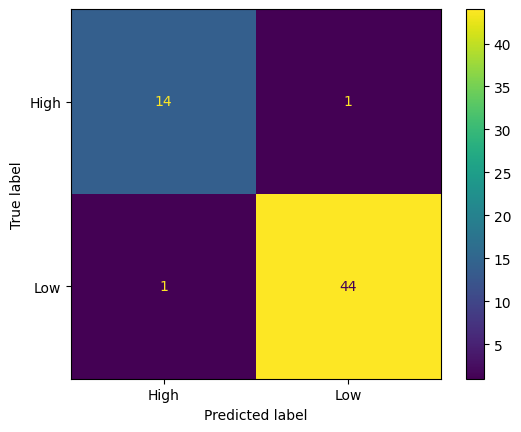

In [11]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = "weighted")

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

labels = ["High", "Low"]
cm = confusion_matrix(y_test, y_pred, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()